In [1]:
# Load packages
import matplotlib.pyplot as plt
import pickle

from FDApy.preprocessing.dim_reduction.fpca import UFPCA
from FDApy.representation.functional_data import DenseFunctionalData
from FDApy.clustering.fcubt import Node, FCUBT

from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
# Load data
with open('./data/scenario_1.pkl', 'rb') as f:
    data_fd = pickle.load(f)
with open('./data/labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [3]:
# Split data into train/test set
values, new_labels = shuffle(data_fd.values, labels, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(values, new_labels, test_size=0.33, random_state=42)

data_train = DenseFunctionalData(data_fd.argvals, X_train)
data_test = DenseFunctionalData(data_fd.argvals, X_test)

## fCUBT clustering

In [4]:
# Initialization of the tree
root_node = Node(data_train, is_root=True)
fcubt = FCUBT(root_node=root_node)

In [5]:
# Fit the tree
fcubt.grow(n_components=0.95)
fcubt.join(n_components=0.95)

## Prediction on the test set

In [6]:
# Perform the prediction on the test set
pred_test = fcubt.predict(data_test, step='join')

In [7]:
res = []
for idx in range(1, len(pred_test) + 1):
    res.append(adjusted_rand_score(y_test[:idx], pred_test[:idx]))

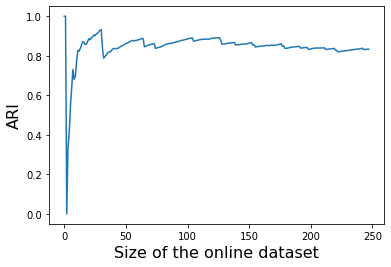

In [8]:
# Plot the results
plt.plot(res)
plt.ylabel('ARI', size=16)
plt.xlabel('Size of the online dataset', size=16)
_ = plt.show()